In [1]:
import pandas as pd
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list[:10])

# 한글 패치 - font list에 있는 것 넣어주시면 됩니다.
plt.rcParams['font.family'] = 'Malgun Gothic'

['DejaVu Serif', 'STIXSizeFourSym', 'cmtt10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmb10']


# 회사개요 데이터 전처리

- 부문 - 주요 제품 데이터

- 회사 신용 등급 평가 데이터

In [2]:
# Raw 데이터 가져오기
company_outlines = []
for i in range(1, 8):
    company_outlines.append(pd.read_csv(f'data/1. 회사의 개요({i}).csv'))

### 부문-주요 제품 전처리

In [3]:
# Raw Data
company_outlines[0]

,부문,주 요 제 품
0,DX 부문,"TV, 모니터, 냉장고, 세탁기, 에어컨,스마트폰, 네트워크시스템, 컴퓨터 등"
1,DS 부문,"DRAM, NAND Flash, 모바일AP 등"
2,SDC,스마트폰용 OLED 패널 등
3,Harman,"디지털 콕핏(Digital Cockpit),카오디오, 포터블스피커 등"


In [4]:
## 전처리 코드
keys = company_outlines[0].keys()
id = -1
data = []

for idx, row in company_outlines[0].iterrows():    
    sector = row[keys[0]]
    products = row[keys[1]].split(',')
    products = [product.strip() for product in products]
    products[-1] = re.sub(r" 등","", products[-1])

    for product in products:
        id += 1
        data.append({"id" : id, "product" : product, "sector" : sector})

product_sector_df = pd.DataFrame(data)

# 전처리 data 저장
product_sector_df.to_csv('preprocessed_data/csv/product_to_sector.csv')
product_sector_df

,id,product,sector
0,0,TV,DX 부문
1,1,모니터,DX 부문
2,2,냉장고,DX 부문
3,3,세탁기,DX 부문
4,4,에어컨,DX 부문
5,5,스마트폰,DX 부문
6,6,네트워크시스템,DX 부문
7,7,컴퓨터,DX 부문
8,8,DRAM,DS 부문
9,9,NAND Flash,DS 부문


### 회사신용 등급 평가 데이터 전처리

In [5]:
## Raw Data
company_outlines[4]

,평가대상유가증권,평가일,평가대상 유가증권의신용등급,평가회사,비고
0,"회사채US$ Bond('97년 발행,'27년 만기)",2021.07,AA-,S&P,정기평가
1,"회사채US$ Bond('97년 발행,'27년 만기)",2021.08,Aa3,Moody's,정기평가
2,"회사채US$ Bond('97년 발행,'27년 만기)",2022.08,AA-,S&P,정기평가
3,"회사채US$ Bond('97년 발행,'27년 만기)",2022.09,Aa2,Moody's,정기평가
4,"회사채US$ Bond('97년 발행,'27년 만기)",2023.07,AA-,S&P,정기평가
5,"회사채US$ Bond('97년 발행,'27년 만기)",2023.08,Aa2,Moody's,정기평가


In [6]:
## 전처리 코드
data = []
moodys_grade = {'Aaa':21, 'Aa1' : 20, 'Aa2' : 19,  'Aa3': 18}
SNP_grade = { 'AAA' : 21, 'AA+': 20, 'AA' : 19, 'AA-': 18}

keys = company_outlines[4].keys()

for idx, row in company_outlines[4].iterrows():
    date = pd.to_datetime(str(row[keys[1]]))
    company = row[keys[3]]

    if company == 'S&P':
        grade = SNP_grade[row[keys[2]]]
    else:
        grade = moodys_grade[row[keys[2]]]
    
    data.append({'company':company, 'date':date, 'grade':grade})

credit_rating_df = pd.DataFrame(data)

# 전처리 data 저장
credit_rating_df.to_csv('preprocessed_data/csv/credit_rating.csv')
credit_rating_df

,company,date,grade
0,S&P,2021-07-01,18
1,Moody's,2021-08-01,18
2,S&P,2022-08-01,18
3,Moody's,2022-09-01,19
4,S&P,2023-07-01,18
5,Moody's,2023-08-01,19


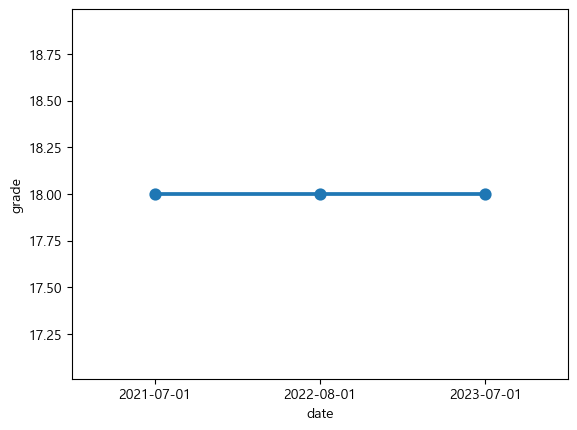

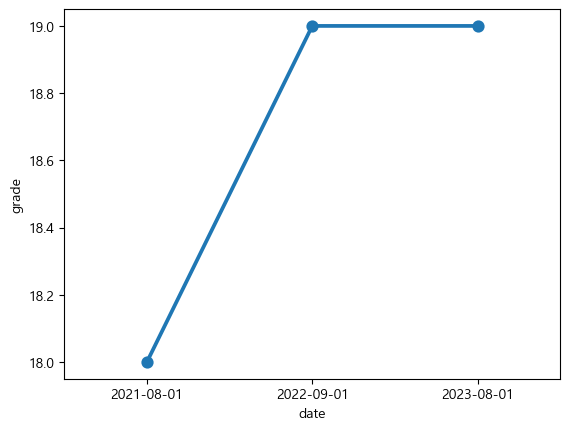

In [7]:
# 전처리 데이터 시각화
snp_data = credit_rating_df.loc[credit_rating_df.company == 'S&P']
moodys_data = credit_rating_df.loc[credit_rating_df.company == "Moody's"]

## S&P 신용평가 그래프
plt.figure()
sns.pointplot(data=snp_data, x='date', y= 'grade')
plt.savefig('preprocessed_data/image/s&p_credit_rating.png')

## moody's 신용평가 그래프
plt.figure()
sns.pointplot(data=moodys_data, x='date', y= 'grade')
plt.savefig('preprocessed_data/image/moodys_credit_rating.png')

plt.show()

# 주요 제품 및 서비스 데이터 전처리

- 주요 제품 매출액과 비중 데이터

- 제품 가격 변동률 데이터

In [8]:
# raw data 가져오기
main_productNservice_data = []
for i in range(1, 5):
    main_productNservice_data.append(pd.read_csv(f'data/2. 주요 제품 및 서비스({i}).csv'))

### 주요 제품 매출액과 비중

In [9]:
# raw data
main_productNservice_data[0]

,부 문,주요 제품,매출액,비중
0,DX 부문,"TV, 모니터, 냉장고, 세탁기, 에어컨,스마트폰, 네트워크시스템, 컴퓨터 등","1,699,923",65.7%
1,DS 부문,"DRAM, NAND Flash, 모바일AP 등","665,945",25.7%
2,SDC,스마트폰용 OLED패널 등,"309,754",12.0%
3,Harman,"디지털 콕핏, 카오디오, 포터블 스피커 등","143,885",5.6%
4,기타,부문간 내부거래 제거 등,"△230,152",△9.0%
5,총 계,총 계,"2,589,355",100.0%


In [10]:
# 전처리 코드
keys = main_productNservice_data[0].keys()

data = []
for idx, row in main_productNservice_data[0].iterrows():
    sector = row[keys[0]]
    sale_revenue = int(re.sub(r"△", "-", re.sub(r",", "", row[keys[2]])))
    weight = float(re.sub(r"△", "-", re.sub(r"%","",row[keys[3]])))

    data.append({"부문" : sector, "매출액":sale_revenue, "비중" : weight})

sale_revenue_by_sector_df = pd.DataFrame(data)

# 전처리 데이터 저장
sale_revenue_by_sector_df.to_csv('preprocessed_data/csv/sale_revenue_by_sector.csv')
sale_revenue_by_sector_df

,부문,매출액,비중
0,DX 부문,1699923,65.7
1,DS 부문,665945,25.7
2,SDC,309754,12.0
3,Harman,143885,5.6
4,기타,-230152,-9.0
5,총 계,2589355,100.0


C:\Users\tjsgh\AppData\Local\Temp\ipykernel_16400\2159973420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_revenue_by_sector_df[:-1], x=keys[0], y=keys[1], palette='Set2')
C:\Users\tjsgh\AppData\Local\Temp\ipykernel_16400\2159973420.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('preprocessed_data/image/sale_revenue_by_sector.png')
C:\Users\tjsgh\AppData\Local\Temp\ipykernel_16400\2159973420.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_revenue_by_sector_df[:-1], x=keys[0], y=keys[2], palette='Set2')
C:\Users\tjsgh\AppData\Local\Temp\ipykernel_16400\2159973420.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing 

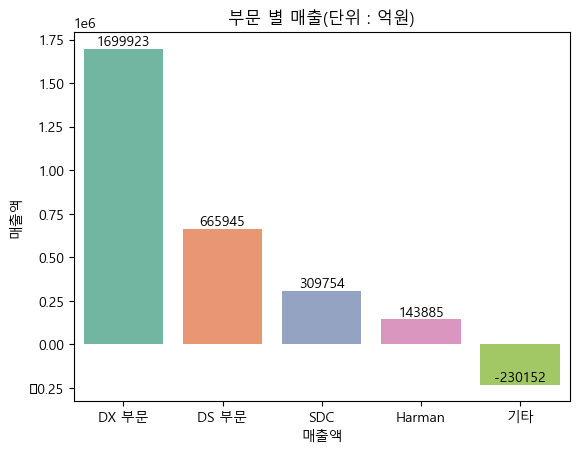

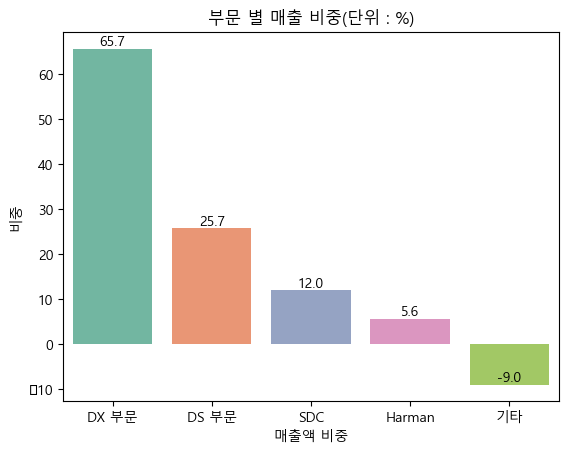

In [11]:
# 전처리 데이터 시각화
keys = sale_revenue_by_sector_df.keys()

# 매출액 막대 그래프 그리기
plt.figure()
sns.barplot(data=sale_revenue_by_sector_df[:-1], x=keys[0], y=keys[1], palette='Set2')

# 각 막대 위에 값 표시하기
for index, value in enumerate(sale_revenue_by_sector_df[keys[1]][:-1], start=1):
    plt.text(index - 1, value, str(value), ha='center', va='bottom') 

plt.title("부문 별 매출(단위 : 억원)")
plt.xlabel('매출액')
plt.savefig('preprocessed_data/image/sale_revenue_by_sector.png')

# 비중 막대 그래프 그리기
plt.figure()
sns.barplot(data=sale_revenue_by_sector_df[:-1], x=keys[0], y=keys[2], palette='Set2')

# 각 막대 위에 값 표시하기
for index, value in enumerate(sale_revenue_by_sector_df[keys[2]][:-1], start=1):
    plt.text(index - 1, value, str(value), ha='center', va='bottom') 
plt.title("부문 별 매출 비중(단위 : %)")
plt.xlabel('매출액 비중')
plt.savefig('preprocessed_data/image/sale_revenue_weight_by_sector.png')

plt.show()



### 제품 가격 변동률 데이터

해당 데이터는 사업보고서에 글로써 표현 되어 있어서 글을 읽고 직접 데이터를 만들었습니다.

In [12]:
## create data
prduct_sale_price_change = []

prduct_sale_price_change.append({"product" : "TV", "price_change(%)" : -3})
prduct_sale_price_change.append({"product" : "스마트폰", "price_change(%)" : 6})
prduct_sale_price_change.append({"product" : "메모리", "price_change(%)" : -45})
prduct_sale_price_change.append({"product" : "스마트폰용 OLED 패널", "price_change(%)" : 2})
prduct_sale_price_change.append({"product" : "디지털 콕핏", "price_change(%)" : 1})

prduct_sale_price_change_df = pd.DataFrame(prduct_sale_price_change)
prduct_sale_price_change_df.to_csv('preprocessed_data/csv/product_sale_price_change.csv')
prduct_sale_price_change_df

,product,price_change(%)
0,TV,-3
1,스마트폰,6
2,메모리,-45
3,스마트폰용 OLED 패널,2
4,디지털 콕핏,1


C:\Users\tjsgh\AppData\Local\Temp\ipykernel_16400\1974490266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = prduct_sale_price_change_df, x = 'product', y='price_change(%)', palette='Set2')
c:\Users\tjsgh\OneDrive\바탕 화면\AI\패스트캠퍼스 AI Lab\EDA\project\company_analyze\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


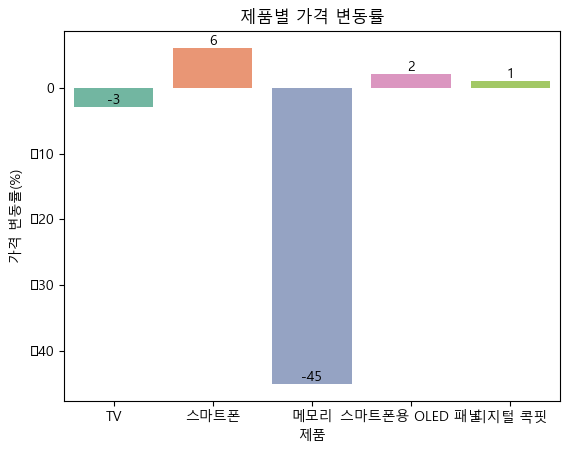

<Figure size 640x480 with 0 Axes>

In [13]:
## 데이터 시각화
sns.barplot(data = prduct_sale_price_change_df, x = 'product', y='price_change(%)', palette='Set2')

# 각 막대 위에 값 표시하기
for index, value in enumerate(prduct_sale_price_change_df['price_change(%)'], start=1):
    plt.text(index - 1, value, str(value), ha='center', va='bottom') 

plt.title("제품별 가격 변동률")
plt.xlabel('제품')
plt.ylabel('가격 변동률(%)')
plt.show()

plt.savefig('preprocessed_data/image/product_sale_price_change.png')

# 회사의 연혁 데이터 전처리

- 회사 주요 사항 역사 데이터

In [14]:
company_history = []
for i in range(1, 5):
    company_history.append(pd.read_csv(f'data/2. 회사의 연혁({i}).csv'))

### 경영활동과 관련된 중요한 사항 데이터

In [15]:
# raw data
company_history[2]

,연도,내용
0,2019,'갤럭시 S10 5G' 5G 스마트폰 출시
1,2019,소비자 라이프스타일 맞춤형 냉장고 '비스포크(BESPOKE)' 출시
2,2019,'엑시노스 980' 5G 모바일 프로세서 공개
3,2019,'갤럭시 폴드' 새로운 폼팩터 폴더블폰 공개
4,2020,'그랑데 AI' 인공지능 기반 세탁기ㆍ건조기 출시
5,2020,AIㆍ차세대 슈퍼컴퓨터용 초고속 DRAM 출시
6,2020,'갤럭시 Z 플립' 폴더블폰 공개
7,2020,세계 최대 규모 평택 반도체 2라인 가동
8,2021,'Neo QLED TV' 공개
9,2021,전세계 반도체 업체 최초 전 사업장 '탄소/물/폐기물 저감' 인증


In [16]:
## 데이터 전처리
data = []
date = ["04-05", "06-04", "09-04", "09-06", "01-29", "02-04", "02-12", "08-30", "03-03", "06-03", "10-12",
        "11-24", "02-17", "06-30","08-19", "11-07", "01-17", "02-02", "05-12", "05-18", "07-06",
        "07-19", "07-26", "09-01", "09-26", "11-08"]

keys = company_history[2].keys()
for idx, row in company_history[2].iterrows():
    
    date_ = pd.to_datetime(str(row[keys[0]]) +"-"+ date[idx])

    data.append({"날짜" : date_, "내용": row[keys[1]]})

history_df = pd.DataFrame(data)
history_df.to_csv('preprocessed_data/csv/company_history.csv')
history_df

,날짜,내용
0,2019-04-05,'갤럭시 S10 5G' 5G 스마트폰 출시
1,2019-06-04,소비자 라이프스타일 맞춤형 냉장고 '비스포크(BESPOKE)' 출시
2,2019-09-04,'엑시노스 980' 5G 모바일 프로세서 공개
3,2019-09-06,'갤럭시 폴드' 새로운 폼팩터 폴더블폰 공개
4,2020-01-29,'그랑데 AI' 인공지능 기반 세탁기ㆍ건조기 출시
5,2020-02-04,AIㆍ차세대 슈퍼컴퓨터용 초고속 DRAM 출시
6,2020-02-12,'갤럭시 Z 플립' 폴더블폰 공개
7,2020-08-30,세계 최대 규모 평택 반도체 2라인 가동
8,2021-03-03,'Neo QLED TV' 공개
9,2021-06-03,전세계 반도체 업체 최초 전 사업장 '탄소/물/폐기물 저감' 인증


# 삼성전자 주가 데이터

- 주가 데이터

In [17]:
import FinanceDataReader as fdr

# 삼성전자 주가 데이터 가져오기
samsung = fdr.DataReader('005930')
samsung = samsung.dropna()
samsung = samsung.reset_index()
samsung.to_csv('preprocessed_data/csv/stock_price.csv')
samsung

,Date,Open,High,Low,Close,Volume,Change
0,2000-01-18,6160,6160,5980,6100,905231,0.000000
1,2000-01-19,6000,6040,5960,5960,804159,-0.022951
2,2000-01-20,5860,6040,5820,6040,746360,0.013423
3,2000-01-21,5950,5980,5880,5880,650728,-0.026490
4,2000-01-24,5800,5900,5700,5700,687183,-0.030612
...,...,...,...,...,...,...,...
5994,2024-04-30,77000,78500,76600,77500,19007007,0.010430
5995,2024-05-02,77600,78600,77300,78000,18900640,0.006452
5996,2024-05-03,79000,79000,77500,77600,13151889,-0.005128
5997,2024-05-07,79600,81300,79400,81300,26238868,0.047680


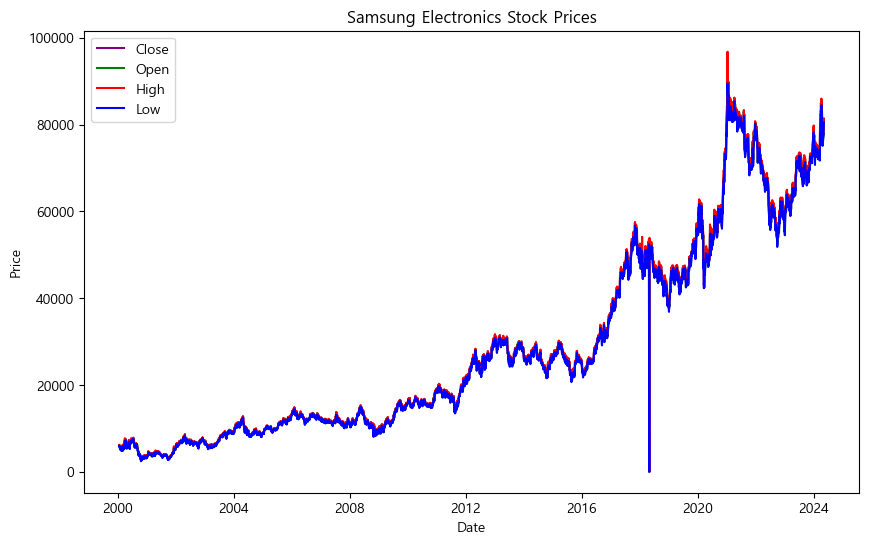

In [18]:
import matplotlib.pyplot as plt

# volume을 제외한 삼성전자 주가 데이터 그리기
plt.figure(figsize=(10, 6))

plt.plot(samsung['Date'], samsung['Close'], label='Close', color='purple')
plt.plot(samsung['Date'], samsung['Open'], label='Open', color='green')
plt.plot(samsung['Date'], samsung['High'], label='High', color='red')
plt.plot(samsung['Date'], samsung['Low'], label='Low', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Electronics Stock Prices')
plt.legend()

plt.savefig('preprocessed_data/image/stock_price.png')
plt.show()

# 매출 및 수주상황 데이터 전처리

In [19]:
sale_prices = []
for i in range(1, 10):
    sale_prices.append(pd.read_csv(f'data/4. 매출 및 수주상황({i}).csv'))

In [20]:
## Raw Data
sale_prices[0]


,부 문,매출유형,품 목,제55기,제54기,제53기
0,DX 부문,"제ㆍ상품,용역 및기타매출","TV, 모니터,냉장고, 세탁기,에어컨, 스마트폰,네트워크시스템,컴퓨터 등","1,699,923","1,824,897","1,662,594"
1,DS 부문,"제ㆍ상품,용역 및기타매출","DRAM,NAND Flash,모바일AP 등","665,945","984,553","953,872"
2,SDC,"제ㆍ상품,용역 및기타매출",스마트폰용 OLED 패널 등,"309,754","343,826","317,125"
3,Harman,"제ㆍ상품,용역 및기타매출","디지털 콕핏,카오디오,포터블 스피커 등","143,885","132,137","100,399"
4,기 타,부문간 내부거래 제거 등,부문간 내부거래 제거 등,"△230,152","△263,099","△237,942"
5,합 계,합 계,합 계,"2,589,355","3,022,314","2,796,048"


In [21]:
## 전처리 코드
data = []

keys = sale_prices[0].keys()
for idx, row in sale_prices[0].iterrows():
    sector = row[keys[0]]
    
    sale_55 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[3]])))
    sale_54 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[4]])))
    sale_53 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[5]])))
    
    data.append({"부문" : sector, "2023년" : sale_55, "2022년" : sale_54, "2021년" : sale_53})

sale_by_sector_df = pd.DataFrame(data)
sale_by_sector_df.to_csv('preprocessed_data/csv/sale_by_sector.csv')
sale_by_sector_df

,부문,2023년,2022년,2021년
0,DX 부문,1699923,1824897,1662594
1,DS 부문,665945,984553,953872
2,SDC,309754,343826,317125
3,Harman,143885,132137,100399
4,기 타,-230152,-263099,-237942
5,합 계,2589355,3022314,2796048


In [22]:
# 데이터프레임을 재구성하여 seaborn을 이용해 시각화하기 위해 melt() 함수 사용
sale_by_sector_df_melted = sale_by_sector_df[:-1].melt(id_vars='부문', var_name='년도', value_name='매출액')
sale_by_sector_df_melted

,부문,년도,매출액
0,DX 부문,2023년,1699923
1,DS 부문,2023년,665945
2,SDC,2023년,309754
3,Harman,2023년,143885
4,기 타,2023년,-230152
5,DX 부문,2022년,1824897
6,DS 부문,2022년,984553
7,SDC,2022년,343826
8,Harman,2022년,132137
9,기 타,2022년,-263099


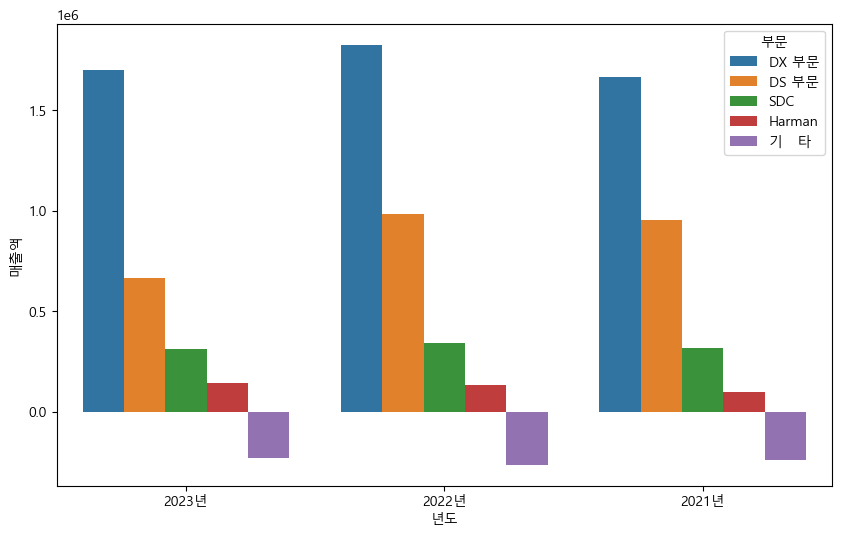

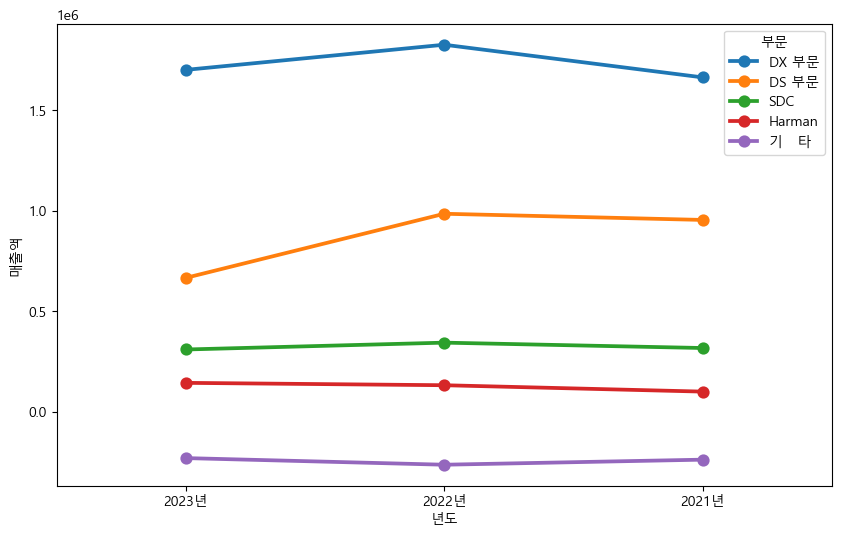

In [23]:

# 부문별 매출액 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=sale_by_sector_df_melted, x='년도', y='매출액', hue='부문')

plt.figure(figsize=(10, 6))
sns.pointplot(data=sale_by_sector_df_melted, x='년도', y='매출액', hue='부문')

# 범례 추가
plt.legend(title='부문')

# 그래프 출력
plt.show()


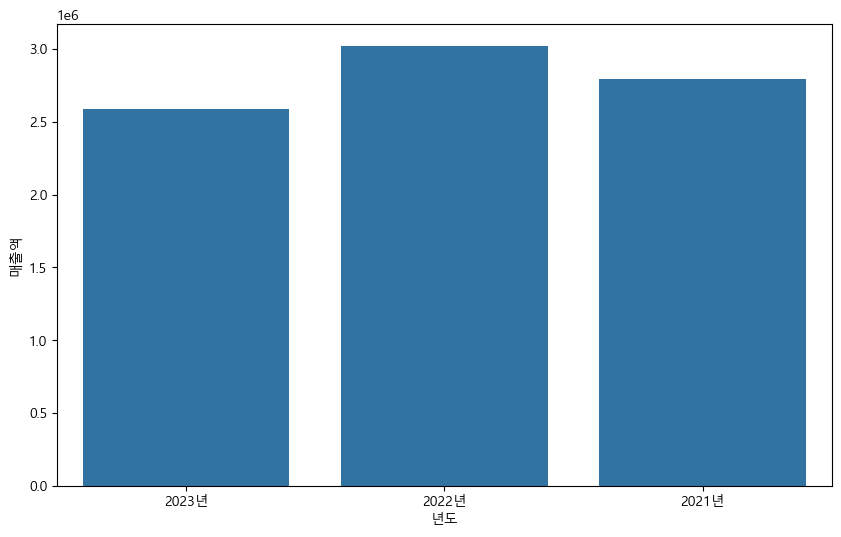

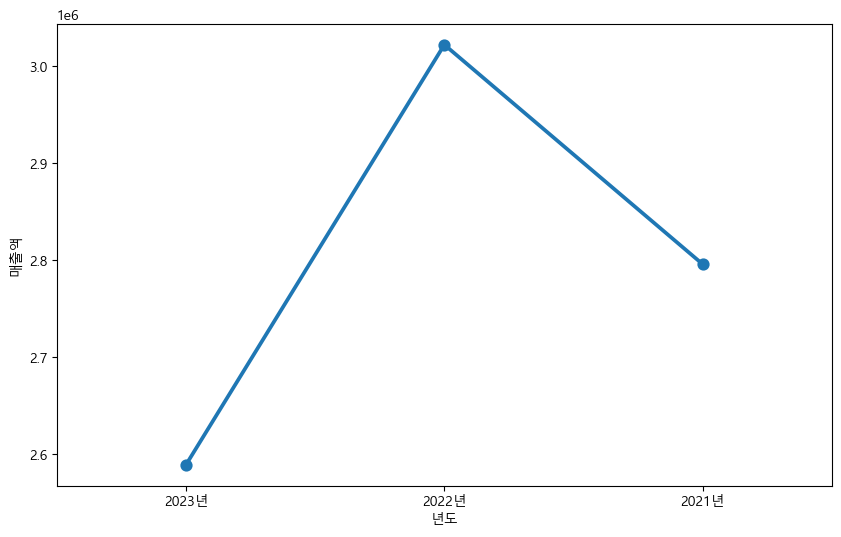

In [24]:
total_row = sale_by_sector_df[sale_by_sector_df.부문 == sale_by_sector_df.부문[5]]
total_melt_df = total_row.melt(id_vars='부문', var_name='년도', value_name='매출액')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_melt_df, x='년도', y='매출액')

plt.figure(figsize=(10, 6))
sns.pointplot(data=total_melt_df, x='년도', y='매출액')
plt.show()

In [25]:
main_product_sale_price_df = sale_prices[1]
main_product_sale_price_df

,구 분,제55기,제54기,제53기
0,"TV, 모니터 등","303,752","332,795","314,974"
1,스마트폰 등,"1,086,325","1,154,254","1,046,806"
2,메모리,"441,254","685,349","726,022"
3,디스플레이 패널,"309,754","343,826","317,125"


In [26]:
data = []
keys = main_product_sale_price_df.keys()

for idx, row in main_product_sale_price_df.iterrows():
    product = row[keys[0]]
    sale_55 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[1]])))
    sale_54 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[2]])))
    sale_53 = int(re.sub(r",", "", re.sub(r"△", "-", row[keys[3]])))
    
    data.append({"년도" : 2023, "제품 및 서비스" : product, "매출액" : sale_55})
    data.append({"년도" : 2022, "제품 및 서비스" : product, "매출액" : sale_54})
    data.append({"년도" : 2021, "제품 및 서비스" : product, "매출액" : sale_53})

main_product_sale_price_df = pd.DataFrame(data)
main_product_sale_price_df

,년도,제품 및 서비스,매출액
0,2023,"TV, 모니터 등",303752
1,2022,"TV, 모니터 등",332795
2,2021,"TV, 모니터 등",314974
3,2023,스마트폰 등,1086325
4,2022,스마트폰 등,1154254
5,2021,스마트폰 등,1046806
6,2023,메모리,441254
7,2022,메모리,685349
8,2021,메모리,726022
9,2023,디스플레이 패널,309754


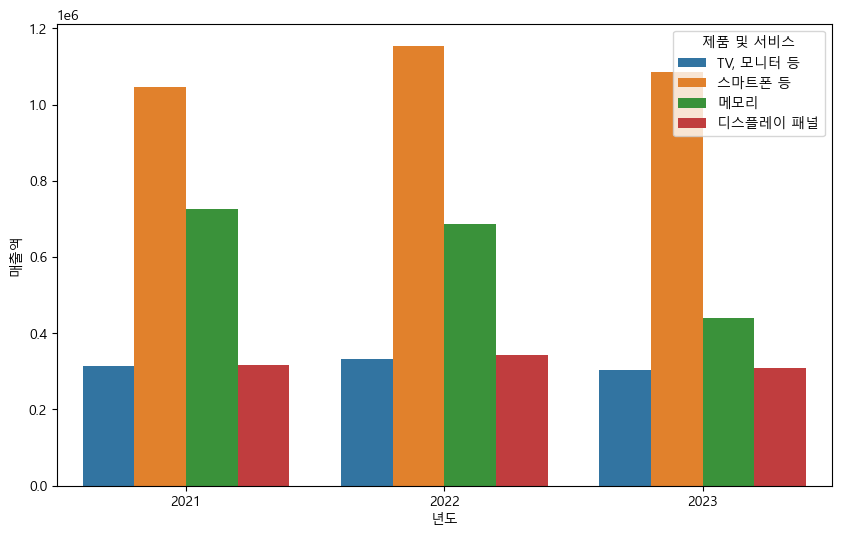

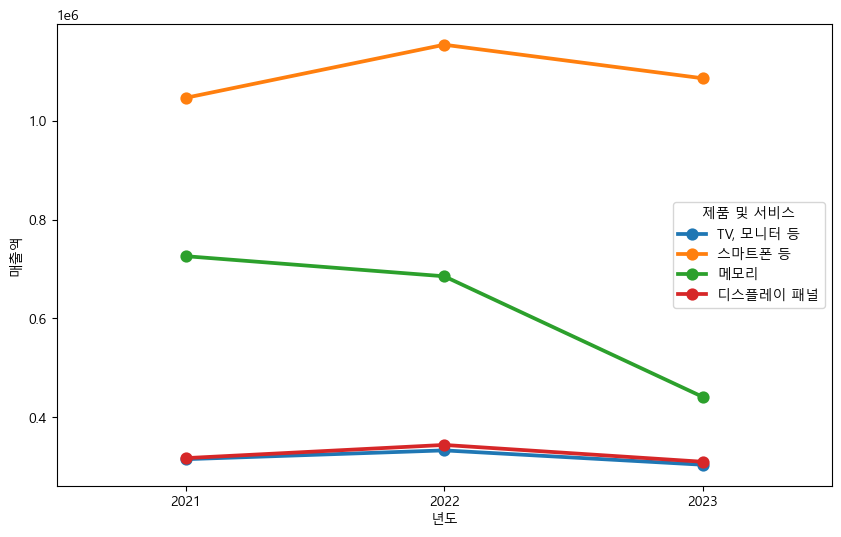

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=main_product_sale_price_df, x='년도', y='매출액', hue='제품 및 서비스')

plt.figure(figsize=(10, 6))
sns.pointplot(data=main_product_sale_price_df, x='년도', y='매출액', hue='제품 및 서비스')

plt.show()

# 년도별 총 매출액 csv만들기  

In [68]:
data = {
    "년도" : [2021, 2022, 2023],
    "총 매출" : [sale_by_sector_df.iloc[5, 1], sale_by_sector_df.iloc[5, 2], sale_by_sector_df.iloc[5, 3]]
}

total_sale_df = pd.DataFrame(data)
total_sale_df.to_csv('preprocessed_data/매출액분석/csv/total_sale.csv')
total_sale_df

,년도,총 매출
0,2021,2589355
1,2022,3022314
2,2023,2796048


# 부문별 매출액 csv 만들기

|년도|DX부문|DS부문|SDC|Harman|기타|
|:---:|:---:|:---:|:---:|:---:|:---:|
|2021| | | | | | 
|2022| | | | | | 
|2023| | | | | | 


In [60]:
sale_by_sector_df

,부문,2023년,2022년,2021년
0,DX 부문,1699923,1824897,1662594
1,DS 부문,665945,984553,953872
2,SDC,309754,343826,317125
3,Harman,143885,132137,100399
4,기 타,-230152,-263099,-237942
5,합 계,2589355,3022314,2796048


In [66]:
data = {
    "년도" : [2021, 2022, 2023],
    "DX 부문 매출액" : [],
    "DS 부문 매출액" : [],
    "SDC 부문 매출액" : [],
    "Harman 부문 매출액" : [],
    "기타 부문 매출액" : []
}

keys = sale_by_sector_df["부문"]

for idx, row in sale_by_sector_df.iterrows():
    if row['부문'] == keys[0]:
        data['DX 부문 매출액'].append(row['2023년'])
        data['DX 부문 매출액'].append(row['2022년'])
        data['DX 부문 매출액'].append(row['2021년'])
    elif row['부문'] == keys[1]:
        data['DS 부문 매출액'].append(row['2023년'])
        data['DS 부문 매출액'].append(row['2022년'])
        data['DS 부문 매출액'].append(row['2021년'])
    elif row['부문'] == keys[2]:
        data['SDC 부문 매출액'].append(row['2023년'])
        data['SDC 부문 매출액'].append(row['2022년'])
        data['SDC 부문 매출액'].append(row['2021년'])
    elif row['부문'] == keys[3]:
        data['Harman 부문 매출액'].append(row['2023년'])
        data['Harman 부문 매출액'].append(row['2022년'])
        data['Harman 부문 매출액'].append(row['2021년'])
    elif row['부문'] == keys[4]:
        data['기타 부문 매출액'].append(row['2023년'])
        data['기타 부문 매출액'].append(row['2022년'])
        data['기타 부문 매출액'].append(row['2021년'])

total_sale_by_sector_df = pd.DataFrame(data)
total_sale_by_sector_df.to_csv('preprocessed_data/매출액분석/csv/total_sale_by_sector.csv')
total_sale_by_sector_df

,년도,DX 부문 매출액,DS 부문 매출액,SDC 부문 매출액,Harman 부문 매출액,기타 부문 매출액
0,2021,1699923,665945,309754,143885,-230152
1,2022,1824897,984553,343826,132137,-263099
2,2023,1662594,953872,317125,100399,-237942


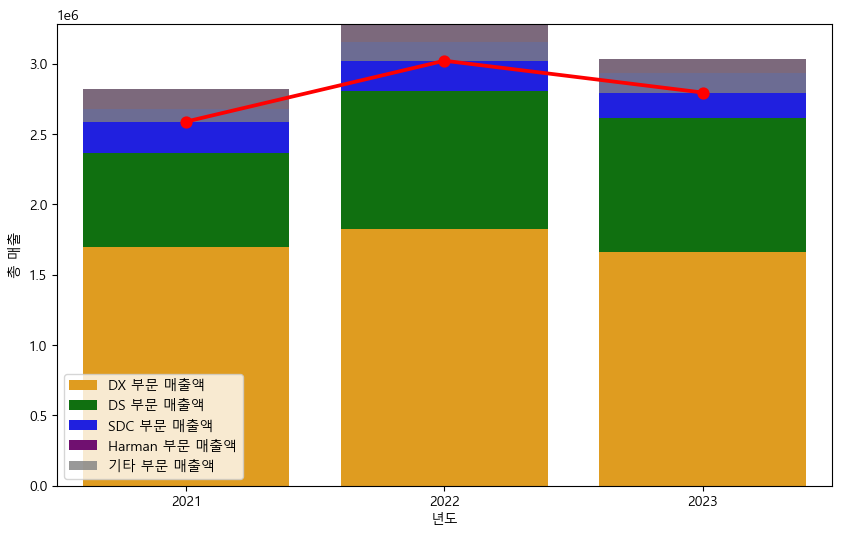

<Figure size 640x480 with 0 Axes>

In [89]:
keys = total_sale_by_sector_df.keys()
plt.figure(figsize=(10, 6))
sns.pointplot(data=total_sale_df, x='년도', y='총 매출', color='red')
sns.barplot(data=total_sale_by_sector_df, x='년도', y='DX 부문 매출액', color='orange', label='DX 부문 매출액')
sns.barplot(data=total_sale_by_sector_df, x='년도', y='DS 부문 매출액', color='green', bottom=sum([total_sale_by_sector_df[i] for i in keys[1:2]]), label='DS 부문 매출액')
sns.barplot(data=total_sale_by_sector_df, x='년도', y='SDC 부문 매출액', color='blue', bottom=sum([total_sale_by_sector_df[i] for i in keys[1:3]]), label='SDC 부문 매출액')
sns.barplot(data=total_sale_by_sector_df, x='년도', y='Harman 부문 매출액', color='purple', bottom=sum([total_sale_by_sector_df[i] for i in keys[1:4]]), label='Harman 부문 매출액')
sns.barplot(data=total_sale_by_sector_df, x='년도', y='기타 부문 매출액', color='gray', alpha=0.8, bottom=sum([total_sale_by_sector_df[i] for i in keys[1:5]]), label='기타 부문 매출액')
plt.legend()

plt.show()
plt.savefig('preprocessed_data/매출액분석/image/total_sale_by_sector.png')